**General Higgs and Generic fields**
=======================

# Setup

## Basic Imports

In [1]:
# Importing tools and declare the project root directory
from importing import *


## 2HDM model

### Create model

In [3]:
# Imports symbols
from Definitions.symbols import init_symbols_higgs
from Definitions.potentials import potential_V0, potential_VCT_higgs
SYMBOLS, FIELDS, PARAMS = init_symbols_higgs(using_omegaCB=False)
POTENTIALS = {"V0": potential_V0, "VCT": potential_VCT_higgs}

model = Model2HDM(name = "2HDM_higgs", 
symbols = SYMBOLS, fields = FIELDS, params = PARAMS, potentials = POTENTIALS)

### Load model

In [4]:
model = load_model("2HDM_higgs")

## Display model

In [5]:
model.display_basic_info(basis="higgs") 

========== Model Information ==========
Field definitions:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Tree-level potential:


<IPython.core.display.Math object>

Counterterm potential:


<IPython.core.display.Math object>

# Tree-level

In [6]:
model.generate_level0_masses(VEV=True)

Tadpole equations:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Solutions to the tadpole equations:


Eq(Y_1, -Z_1*v**2/2)

Eq(re(Y_{12}), v**2*re(Z_6)/2)

Eq(im(Y_{12}), v**2*im(Z_6)/2)

Mass matrix:


Matrix([
[     Z_1*v**2,                                   v**2*re(Z_6), 0,                                  -v**2*im(Z_6), 0,                0, 0,                0],
[ v**2*re(Z_6), Y_2 + Z_3*v**2/2 + Z_4*v**2/2 + v**2*re(Z_5)/2, 0,                                -v**2*im(Z_5)/2, 0,                0, 0,                0],
[            0,                                              0, 0,                                              0, 0,                0, 0,                0],
[-v**2*im(Z_6),                                -v**2*im(Z_5)/2, 0, Y_2 + Z_3*v**2/2 + Z_4*v**2/2 - v**2*re(Z_5)/2, 0,                0, 0,                0],
[            0,                                              0, 0,                                              0, 0,                0, 0,                0],
[            0,                                              0, 0,                                              0, 0, Y_2 + Z_3*v**2/2, 0,                0],
[            0,                            

Charged mass eigenvalues:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Neutral mass eigenvalues:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
model.generate_level0_masses()



Tadpole equations:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Solutions to the tadpole equations:


Eq(Y_1, -Z_1*v**2/2)

Eq(re(Y_{12}), v**2*re(Z_6)/2)

Eq(im(Y_{12}), v**2*im(Z_6)/2)

Mass matrix:


Matrix([
[         3*Z_1*\omega**2/2 - Z_1*v**2/2,                        3*\omega**2*re(Z_6)/2 - v**2*re(Z_6)/2,                                    0,                       -3*\omega**2*im(Z_6)/2 + v**2*im(Z_6)/2,                                     0,                                    0,                                    0,                                     0],
[ 3*\omega**2*re(Z_6)/2 - v**2*re(Z_6)/2, Y_2 + Z_3*\omega**2/2 + Z_4*\omega**2/2 + \omega**2*re(Z_5)/2, \omega**2*im(Z_6)/2 - v**2*im(Z_6)/2,                                          -\omega**2*im(Z_5)/2,                                     0,                                    0,                                    0,                                     0],
[                                      0,                          \omega**2*im(Z_6)/2 - v**2*im(Z_6)/2,         Z_1*\omega**2/2 - Z_1*v**2/2,                          \omega**2*re(Z_6)/2 - v**2*re(Z_6)/2,                                     0,                         

Charged mass eigenvalues:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Neutral mass eigenvalues:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Plotting masses

Minimum at omega = 233.05. +- 24.60


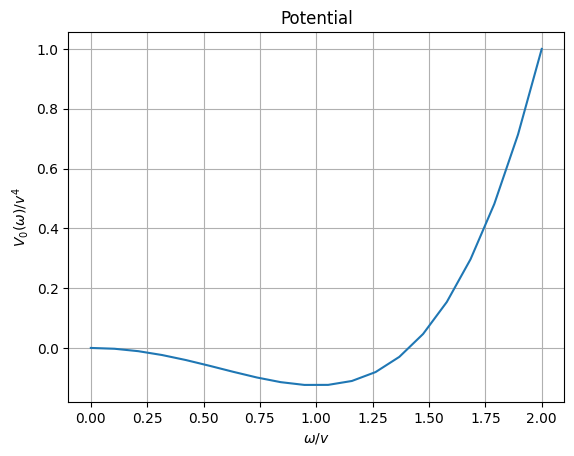

VEV Mass: 0.00
VEV Mass: 301.29


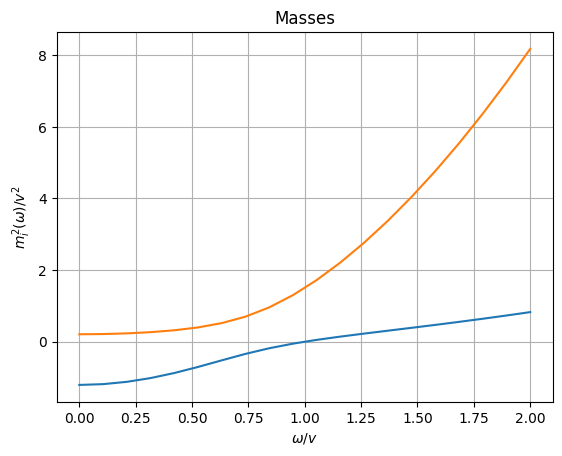

VEV Mass: 123.89
VEV Mass: -0.00
VEV Mass: 512.38
VEV Mass: 454.14


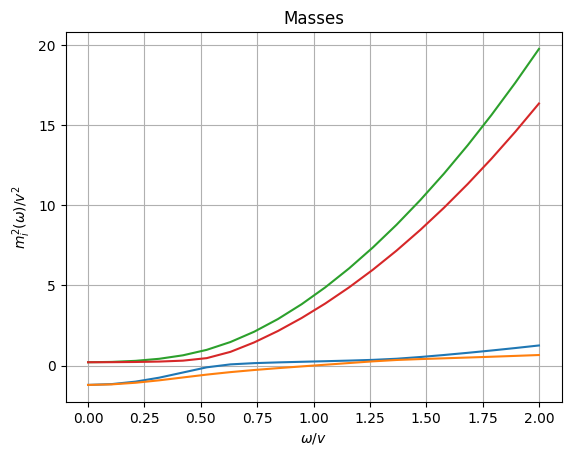

In [5]:
import matplotlib.pyplot as plt

# Faster to just diagonalize matrix and get eigenvalues?

#Tadpole conditions
Z1, R_Z6, I_Z6 = 1, 1, 1
v = 246 #model.omega
Y11 = -v**2/2*Z1
R_Y12 = v**2/2*R_Z6
I_Y12 = v**2/2*I_Z6

params_values = [Y11, -v**2/2,
                    Z1,1,4,4,
                    R_Y12,I_Y12,
                    -1,-1,R_Z6,I_Z6,-1,1]

threshold = 1e-6
N = 20
offset = 1 # 1 to 0
X = np.linspace(v*(1-offset), v*(1+offset), N)


# Symbols and substitutions
omega = model.symbol("omega")
params = model.params("V0", complex=False)
subs_params_values = {param:value for param, value in zip(params, params_values)}
subs_params_values = subs_params_values | {model.symbol("v"): v}
subs_fields_dict = {field:0 for field in model.field("fields")}

"""masses_VEV = model.masses("M0_charged_eigenvalues_higgs_VEV") + model.masses("M0_neutral_eigenvalues_higgs_VEV")
for mass in masses_VEV:
    mass = mass.subs(subs_fields_dict)
    mass = mass.subs(subs_params_values).evalf()
    mass_VEV = mass.subs({omega:v}).evalf()
    if sp.im(mass_VEV) < threshold:
        mass = sp.re(mass).evalf()
        mass_VEV = sp.re(mass_VEV)
        mass_VEV = sp.sign(mass_VEV)*sp.sqrt(sp.Abs(mass_VEV))
        print(f"VEV Mass: {mass_VEV:0.2f}")
"""
# Plot potential
V0 = model.potential("V0").subs(subs_fields_dict | subs_params_values)

Y = np.array([V0.subs(omega, x) for x in X])

minima_index = np.argmin(Y)
chunks = 2*offset*v/N
print(rf"Minimum at omega = {X[minima_index]:0.2f}. +- {chunks:0.2f}")

plt.figure()
plt.plot(X/v, Y/v**4)
plt.xlabel("$\omega/v$")
plt.ylabel("$V_0(\omega)/v^4$")
plt.title("Potential")
plt.grid()
plt.show()

plt.figure()
masses = model.masses("M0_charged_eigenvalues")
for mass in masses:
    mass = mass.subs(subs_fields_dict)
    mass = mass.subs(subs_params_values).evalf()
    mass_VEV = mass.subs({omega:v}).evalf()
    if sp.im(mass_VEV) < threshold:
        mass = sp.re(mass).evalf()
        mass_VEV = sp.re(mass_VEV)
        mass_VEV = sp.sign(mass_VEV)*sp.sqrt(sp.Abs(mass_VEV))
        print(f"VEV Mass: {mass_VEV:0.2f}")
    Y = np.array([mass.subs(omega, x) for x in X])
    plt.plot(X/v, Y/v**2)
plt.xlabel("$\omega/v$")
plt.ylabel("$m_i^2(\omega)/v^2$")
plt.title("Masses")
plt.grid()
plt.show()

plt.figure()
masses = model.masses("M0_neutral_eigenvalues")
for mass in masses:
    mass = mass.subs(subs_fields_dict)
    mass = mass.subs(subs_params_values).evalf()
    mass_VEV = mass.subs({omega:v}).evalf()
    if sp.im(mass_VEV) < threshold:
        mass = sp.re(mass).evalf()
        mass_VEV = sp.re(mass_VEV)
        mass_VEV = sp.sign(mass_VEV)*sp.sqrt(sp.Abs(mass_VEV))
        print(f"VEV Mass: {mass_VEV:0.2f}")
    Y = np.array([mass.subs(omega, x) for x in X])
    plt.plot(X/v, Y/v**2)
plt.xlabel("$\omega/v$")
plt.ylabel("$m_i^2(\omega)/v^2$")
plt.title("Masses")
plt.grid()
plt.show()


## Solve for the counterterms

In [22]:

params_CT = model.params("VCT", complex=False)

model.SYMBOLS["a"] = sp.symbols("a")
model.SYMBOLS["b"] = sp.symbols("b")
model.SYMBOLS["c"] = sp.symbols("c")
model.SYMBOLS["d"] = sp.symbols("d")


constraints = [sp.Eq(params_CT[7], model.symbol("a")* params_CT[6]),
               sp.Eq(params_CT[9], model.symbol("b") * params_CT[8]),
               sp.Eq(params_CT[11], model.symbol("c") * params_CT[10]),
               sp.Eq(params_CT[13], model.symbol("d") * params_CT[12])]    


model.solve_counterterms(extra_eqs=None)

=============== Initial conditions ===============
Number of variables: 24
Number of total eqs: 23
Number of linearly independent equations: 18
=================== Equations ====================


Eq(-N_{1}, \delta T_1 + \delta Y_1*v + \delta Z_1*v**3/2)

Eq(-N_{2}, \delta T_2 + v**3*re(\delta Z_6)/2 - v*re(\delta Y_{12}))

Eq(-N_{3}, \delta\Delta_{13}*v**2)

Eq(-N_{4}, \delta T_{CP} + \delta\Delta_{14}*v**2 - v**3*im(\delta Z_6)/2 + v*im(\delta Y_{12}))

Eq(-N_{5}, \delta T_{CB})

Eq(-H_{11}, \delta Y_1 + 3*\delta Z_1*v**2/2)

Eq(-H_{12}, 3*v**2*re(\delta Z_6)/2 - re(\delta Y_{12}))

Eq(-H_{13}, 2*\delta\Delta_{13}*v)

Eq(-H_{14}, 2*\delta\Delta_{14}*v - 3*v**2*im(\delta Z_6)/2 + im(\delta Y_{12}))

Eq(-H_{22}, \delta Y_2 + \delta Z_3*v**2/2 + \delta Z_4*v**2/2 + v**2*re(\delta Z_5)/2)

Eq(-H_{23}, v**2*im(\delta Z_6)/2 - im(\delta Y_{12}))

Eq(-H_{24}, \delta\Delta_{24}*v - v**2*im(\delta Z_5)/2)

Eq(-H_{33}, \delta Y_1 + \delta Z_1*v**2/2 + 2*\delta\Delta_{33}*v)

Eq(-H_{34}, v**2*re(\delta Z_6)/2 - re(\delta Y_{12}))

Eq(-H_{44}, \delta Y_2 + \delta Z_3*v**2/2 + \delta Z_4*v**2/2 - v**2*re(\delta Z_5)/2)

Eq(-H_{55}, \delta Y_1 + \delta Z_1*v**2/2)

Eq(-H_{56}, \delta\Delta_{78}*v + v**2*re(\delta Z_6)/2 - re(\delta Y_{12}))

Eq(-H_{58}, -\delta\Delta_{67}*v - v**2*im(\delta Z_6)/2 + im(\delta Y_{12}))

Eq(-H_{66}, \delta Y_2 + \delta Z_3*v**2/2)

Eq(-H_{67}, \delta\Delta_{67}*v + v**2*im(\delta Z_6)/2 - im(\delta Y_{12}))

Eq(-H_{77}, \delta Y_1 + \delta Z_1*v**2/2)

Eq(-H_{78}, \delta\Delta_{78}*v + v**2*re(\delta Z_6)/2 - re(\delta Y_{12}))

Eq(-H_{88}, \delta Y_2 + \delta Z_3*v**2/2)

========= Linearly independent equations =========


Eq(-N_{1}, \delta T_1 + \delta Y_1*v + \delta Z_1*v**3/2)

Eq(-N_{2}, \delta T_2 + v**3*re(\delta Z_6)/2 - v*re(\delta Y_{12}))

Eq(-N_{3}, \delta\Delta_{13}*v**2)

Eq(-N_{4}, \delta T_{CP} + \delta\Delta_{14}*v**2 - v**3*im(\delta Z_6)/2 + v*im(\delta Y_{12}))

Eq(-N_{5}, \delta T_{CB})

Eq(-H_{11}, \delta Y_1 + 3*\delta Z_1*v**2/2)

Eq(-H_{12}, 3*v**2*re(\delta Z_6)/2 - re(\delta Y_{12}))

Eq(-H_{14}, 2*\delta\Delta_{14}*v - 3*v**2*im(\delta Z_6)/2 + im(\delta Y_{12}))

Eq(-H_{22}, \delta Y_2 + \delta Z_3*v**2/2 + \delta Z_4*v**2/2 + v**2*re(\delta Z_5)/2)

Eq(-H_{23}, v**2*im(\delta Z_6)/2 - im(\delta Y_{12}))

Eq(-H_{24}, \delta\Delta_{24}*v - v**2*im(\delta Z_5)/2)

Eq(-H_{33}, \delta Y_1 + \delta Z_1*v**2/2 + 2*\delta\Delta_{33}*v)

Eq(-H_{34}, v**2*re(\delta Z_6)/2 - re(\delta Y_{12}))

Eq(-H_{44}, \delta Y_2 + \delta Z_3*v**2/2 + \delta Z_4*v**2/2 - v**2*re(\delta Z_5)/2)

Eq(-H_{55}, \delta Y_1 + \delta Z_1*v**2/2)

Eq(-H_{56}, \delta\Delta_{78}*v + v**2*re(\delta Z_6)/2 - re(\delta Y_{12}))

Eq(-H_{58}, -\delta\Delta_{67}*v - v**2*im(\delta Z_6)/2 + im(\delta Y_{12}))

Eq(-H_{66}, \delta Y_2 + \delta Z_3*v**2/2)

==================== Solution ====================


Eq(\delta Y_1, H_{11}/2 - 3*H_{77}/2)

Eq(\delta Y_2, -H_{88} - \delta Z_3*v**2/2)

Eq(\delta Z_1, -H_{11}/v**2 + H_{77}/v**2)

Eq(\delta Z_4, -H_{22}/v**2 - H_{44}/v**2 + 2*H_{88}/v**2)

Eq(re(\delta Y_{12}), -H_{12}/2 + 3*H_{34}/2)

Eq(im(\delta Y_{12}), H_{14}/2 + 3*H_{23}/2 + \delta\Delta_{14}*v)

Eq(re(\delta Z_5), -H_{22}/v**2 + H_{44}/v**2)

Eq(im(\delta Z_5), 2*H_{24}/v**2 + 2*\delta\Delta_{24}/v)

Eq(re(\delta Z_6), -H_{12}/v**2 + H_{34}/v**2)

Eq(im(\delta Z_6), H_{14}/v**2 + H_{23}/v**2 + 2*\delta\Delta_{14}/v)

Eq(\delta T_1, H_{77}*v - N_{1})

Eq(\delta T_2, H_{34}*v - N_{2})

Eq(\delta T_{CP}, -H_{23}*v - N_{4} - \delta\Delta_{14}*v**2)

Eq(\delta T_{CB}, -N_{5})

Eq(\delta\Delta_{13}, -H_{13}/(2*v))

Eq(\delta\Delta_{33}, -H_{33}/(2*v) + H_{77}/(2*v))

Eq(\delta\Delta_{67}, H_{23}/v - H_{67}/v)

Eq(\delta\Delta_{78}, H_{34}/v - H_{78}/v)

============= Undetermined equations =============
Undetermined parameters will be set to zero


Eq(\delta Z_2, \delta Z_2)

Eq(\delta Z_3, \delta Z_3)

Eq(re(\delta Z_7), re(\delta Z_7))

Eq(im(\delta Z_7), im(\delta Z_7))

Eq(\delta\Delta_{14}, \delta\Delta_{14})

Eq(\delta\Delta_{24}, \delta\Delta_{24})

============= Consistency equations ==============


Eq(N_{3}, H_{13}*v/2)

Eq(H_{55}, H_{77})

Eq(H_{56}, H_{78})

Eq(H_{58}, -H_{67})

Eq(H_{66}, H_{88})

=============== Counterterm matrix ===============
Please check if the solution is correct


Matrix([
[                                   \delta Y_1 + 3*\delta Z_1*v**2/2,                                3*v**2*re(\delta Z_6)/2 - re(\delta Y_{12}),                                  2*\delta\Delta_{13}*v,        2*\delta\Delta_{14}*v - 3*v**2*im(\delta Z_6)/2 + im(\delta Y_{12}),                                                                0,                                                               0,                                                               0,                                                                0],
[                        3*v**2*re(\delta Z_6)/2 - re(\delta Y_{12}), \delta Y_2 + \delta Z_3*v**2/2 + \delta Z_4*v**2/2 + v**2*re(\delta Z_5)/2,              v**2*im(\delta Z_6)/2 - im(\delta Y_{12}),                                \delta\Delta_{24}*v - v**2*im(\delta Z_5)/2,                                                                0,                                                               0,                                          

Matrix([
[-H_{11}, -H_{12}, -H_{13}, -H_{14},       0,       0,       0,       0],
[-H_{12}, -H_{22}, -H_{23}, -H_{24},       0,       0,       0,       0],
[-H_{13}, -H_{23}, -H_{33}, -H_{34},       0,       0,       0,       0],
[-H_{14}, -H_{24}, -H_{34}, -H_{44},       0,       0,       0,       0],
[      0,       0,       0,       0, -H_{77}, -H_{78},       0,  H_{67}],
[      0,       0,       0,       0, -H_{78}, -H_{88}, -H_{67},       0],
[      0,       0,       0,       0,       0, -H_{67}, -H_{77}, -H_{78}],
[      0,       0,       0,       0,  H_{67},       0, -H_{78}, -H_{88}]])

In [42]:
reload_and_import("Code.Model2HDM.methods_Model2HDM", "calculate_CW_potential_derivatives_numerical")

import Code.Utils.constants as const
print(const.v)

v = 246
fields = model.fieldset("higgs")
fields_mass = model.fieldset("mass")
params = model.params("V0_higgs", complex=False)
params_values_subs = {param:value for param, value in zip(params, params_values)}
bgfields_values_subs = {model.symbol("omega"): 246, model.symbol("omegaCB"): 0}
VEV_values_subs = {model.symbol("v"): v, model.symbol("vCB"): 0}

M0 = model.masses("M0_higgs")
M0_numerical = M0.subs(bgfields_values_subs | VEV_values_subs | params_values_subs).evalf()

V0 = model.potential("V0_higgs")
V0 = V0.subs(bgfields_values_subs | VEV_values_subs | params_values_subs).evalf()

display(M0_numerical)

result = calculate_CW_potential_derivatives_numerical(M0_numerical, fields, fields_mass,
                                                 V0, params_values_subs, bgfields_values_subs, VEV_values_subs,
                                                 show_procedure=False)

display(*result)

246


Matrix([
[ 60516.0,  60516.0, 0, -60516.0, 0,       0, 0,       0],
[ 60516.0, 181548.0, 0,  30258.0, 0,       0, 0,       0],
[       0,        0, 0,        0, 0,       0, 0,       0],
[-60516.0,  30258.0, 0, 242064.0, 0,       0, 0,       0],
[       0,        0, 0,        0, 0,       0, 0,       0],
[       0,        0, 0,        0, 0, 90774.0, 0,       0],
[       0,        0, 0,        0, 0,       0, 0,       0],
[       0,        0, 0,        0, 0,       0, 0, 90774.0]])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Calculating the trilinear couplings...
96 / 120 
Calculating the quartic couplings...
Calculating the $N_i$ derivatives...
\nCalculating the $H_{ij}$ derivatives...


Matrix([
[     370869.345652844],
[     3252.08416949781],
[-9.34229877037356e-13],
[    -40197.2273291202],
[                  0.0],
[                  0.0],
[                  0.0],
[                  0.0]])

Matrix([
[  10801.279498027, -1970.85335391286, -256.987619242147, -1361.07231090159,              0.0,              0.0,              0.0,              0.0],
[-1970.85335391286,  4343.18264392763,  1895.07397208521,  544.106636453752,              0.0,              0.0,              0.0,              0.0],
[-256.987619242147,  1895.07397208521,  2074.18504343834,  182.968565364053,              0.0,              0.0,              0.0,              0.0],
[-1361.07231090159,  544.106636453751,  182.968565364053,  5650.40396486387,              0.0,              0.0,              0.0,              0.0],
[              0.0,               0.0,               0.0,               0.0, 4219.64679982715, 309.801929755563,              0.0, -2155.8074028613],
[              0.0,               0.0,               0.0,               0.0, 309.801929755563, 5743.40275877597,  2155.8074028613,              0.0],
[              0.0,               0.0,               0.0,               0.0,              0

In [41]:

import importlib
import Code.Utils.constants as const
reload_and_import("Code.Model2HDM", "methods_Model2HDM")
reload_and_import("Code.Utils.methods_math", "diagonalize_numerical_matrix")
reload_and_import("Code.Utils.methods_math", "compute_unique_permutations")
print(const.v)

246


In [19]:
textwidth = 30
text = "Initial conditions"
ftext = f"{text:=^{textwidth}}"
print(ftext)
print("Initial conditions".center(textwidth, "="))

======Initial conditions======
======Initial conditions======
